In [1]:
# Example 2 - Exploratory Data Analysis
# Import ana Analysis CSV data

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## file path: windows style
df = pd.read_csv('diabetes.csv')

# shape method gives the dimensions of the dataset
print('Dataset dimensions: {} rows, {} columns'.format(df.shape[0], df.shape[1]))

Dataset dimensions: 768 rows, 9 columns


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             555 non-null    float64
 4   Insulin                   408 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [4]:
diabetes_pd = pd.DataFrame(df.values)
diabetes_pd.head()

,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [5]:
diabetes_pd.columns = df.columns
diabetes_pd.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [6]:
diabetes_pd

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47.0,1.0


In [7]:
# Please proceed to perform the following tasks:
# 1. Derive Descriptive Statistics on the dataset
# 2. Steps to deal with missing data
# 3. Outlier detection - Boxplots and Scatter Plots
# 4. Examine data distribution with Histogram
# 5. Examine correlations among features and with the target

In [7]:
# Descriptive Statistics
diabetes_pd.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,555.0,29.203604,10.457236,7.000,22.00000,29.0000,36.00000,99.00
Insulin,408.0,155.928922,117.482404,14.000,78.00000,126.5000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
# Display rows with missing data
diabetes_pd[diabetes_pd.isnull().any(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1.0
5,5.0,116.0,74.0,NaN,NaN,25.6,0.201,30.0,0.0
7,10.0,115.0,NaN,NaN,NaN,35.3,0.134,29.0,0.0
...,...,...,...,...,...,...,...,...,...
761,9.0,170.0,74.0,31.0,NaN,44.0,0.403,43.0,1.0
762,9.0,89.0,62.0,NaN,NaN,22.5,0.142,33.0,0.0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27.0,0.0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47.0,1.0


In [10]:
# Count the number of missing values for each column
diabetes_pd.isnull().sum()
total = diabetes_pd.isnull().sum().sort_values(ascending=False)
percent = (diabetes_pd.isnull().sum()/diabetes_pd.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, 
                         keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Insulin,360,0.468750
SkinThickness,213,0.277344
BloodPressure,35,0.045573
BMI,11,0.014323
Glucose,5,0.006510
Pregnancies,0,0.000000
DiabetesPedigreeFunction,0,0.000000
Age,0,0.000000
Outcome,0,0.000000


In [11]:
# Count the number of non-missing data
diabetes_pd.notna().sum()

Pregnancies                 768
Glucose                     763
BloodPressure               733
SkinThickness               555
Insulin                     408
BMI                         757
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [12]:
# Remove one more column that will not help predict the outcome
diabetes_pd.drop(['Insulin'], axis=1, inplace=True)
diabetes_pd.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,26.6,0.351,31.0,0.0


In [13]:
# Drop missing values
# tomatjus_pd.shape
# tomatjus_pd = tomatjus_pd.dropna()
# tomatjus_pd.shape
# Fill missing values with mean value
diabetes_pd.fillna(diabetes_pd.median(), inplace = True)
diabetes_pd

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,29.0,30.1,0.349,47.0,1.0


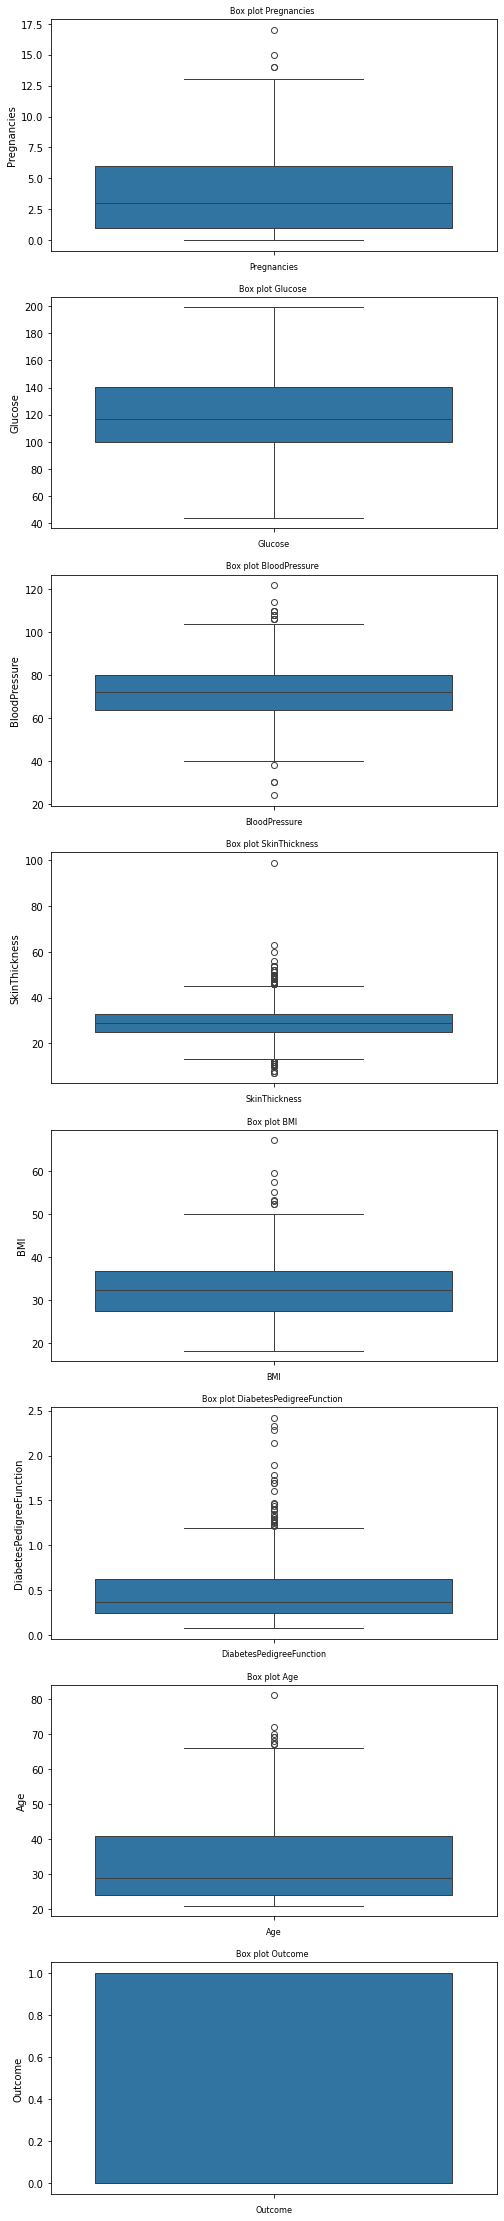

In [14]:
# Box Plots for all columns
fig,  ax = plt.subplots(len(list(diabetes_pd.columns)), figsize=(8,40))

for i, feature_name in enumerate(list(diabetes_pd.columns)):
    sns.boxplot(y=diabetes_pd[feature_name], ax=ax[i]);
    ax[i].set_xlabel(feature_name, fontsize=8);
    ax[i].set_title("Box plot {} ".format(feature_name), fontsize=8);

plt.show();

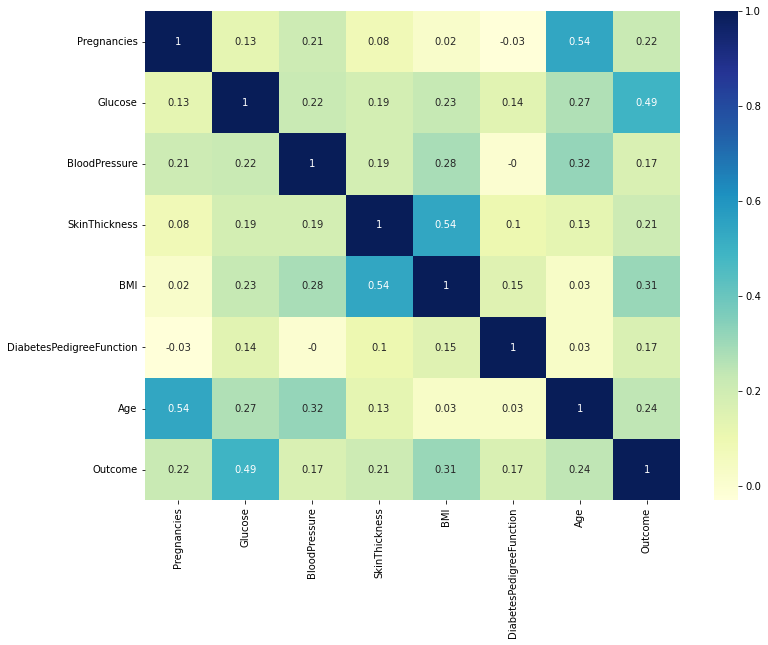

In [15]:
# Heatmap
plt.figure(figsize=(12, 9));
correlation_matrix = diabetes_pd.corr().round(2);
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True);

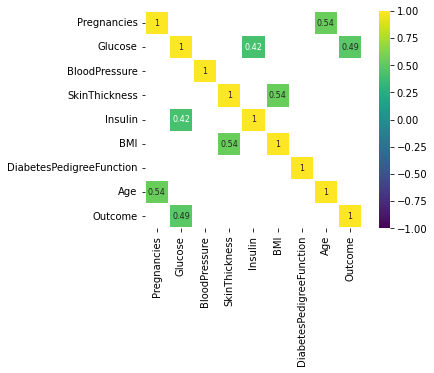

In [16]:
# Highlight high correlation
sns.heatmap(correlation_matrix[(correlation_matrix >= 0.4) | (correlation_matrix <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [16]:
# Calculate correlation
import operator

individual_features_df = []
for i in range(0, len(diabetes_pd.columns) - 1): # -1 because the last column is quality
    tmpDf = diabetes_pd[[diabetes_pd.columns[i], 'Outcome']]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['Outcome'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

  BloodPressure: 0.1657229130805769
DiabetesPedigreeFunction: 0.17384406565296
  SkinThickness: 0.21300794444914292
    Pregnancies: 0.22189815303398636
            Age: 0.23835598302719754
            BMI: 0.3120383386771112
        Glucose: 0.4927824039150269


<ipython-input-16-dd7dcd53784a>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  all_correlations = {feature.columns[0]: feature.corr()['Outcome'][0] for feature in individual_features_df}
